https://www.kaggle.com/kushalvala/concrete

In [ ]:
#for data analysis and data manipulation we uses pandas library as pd
import pandas as pd
#whereas for various numerical computations and processing of the multidimensional and single-dimensional array elements
#we uses numpy library as np
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Concrete.csv to Concrete.csv


In [ ]:
#The dataset used here has the concentrations of the constituents of concrete and its compressive strength
#read_csv is used from pandas library to read datasets('csv files')
df = pd.read_csv('concrete.csv')
#The head() function is used to get the first n rows. This function returns the first n rows for the object based on position
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:
#here we dont need superplasticizer and flow to calculate the compressive strength of concrete cement
#so droping that column
df = df.drop(['superplasticizer','flyash'], axis=1)

In [ ]:
#viewing the datasets after droping some less important columns
df.head()


,cement,slag,water,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,162.0,1040.0,676.0,28,79.99
1,540.0,0.0,162.0,1055.0,676.0,28,61.89
2,332.5,142.5,228.0,932.0,594.0,270,40.27
3,332.5,142.5,228.0,932.0,594.0,365,41.05
4,198.6,132.4,192.0,978.4,825.5,360,44.30


In [ ]:

#defining the input x and output y
x = df.iloc[ : , :6]
y = df.iloc[ : , 6]

In [ ]:
#data preproceesing
#normalization
for i in range(0, len(x.columns)):
 c = x.columns[i]
 x[c] = (x[c] - np.min(x[c])) / (np.max(x[c]) - np.min(x[c]))
x.head()

,cement,slag,water,coarseaggregate,fineaggregate,age
0,1.000000,0.000000,0.321086,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.321086,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.848243,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.848243,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.560703,0.515698,0.580783,0.986264


In [ ]:

#Initialize theta value
theta = np.array([0]*len(x.columns))


In [ ]:

#Length of training set
m = len(df)
m

1030

In [ ]:
#hypothesis function
#Defining the hypothesis that takes the input variables and theta. It returns the calculated output variable
def hypothesis(theta, x):
 return theta*x


In [ ]:
# defining ComputeCost
# the cost function that takes the input variables, output variable, and theta
#calculating it by using root mean square error
#RMSE
def computeCost(theta, x, y):
 y1 = hypothesis(theta, x)
 y1 = np.sum(y1, axis=1)
 return sum(np.sqrt((y1-y)**2)) / (2*m) ##It returns the cost of the hypothesis.

In [ ]:
#Defining the function ‘gradient_descent’ now.
#This function will take input variables, output variable, theta, alpha, and the number of epochs as the parameter.
#Here, alpha is the learning rate.
def gradientDescent(theta, x, y, alpha, iteration):
    J = [] #Cost function in each iteration
    k = 0
    while k < iteration:
      y1 = hypothesis(theta, x)
      y1 = np.sum(y1, axis=1)
      for c in range(0,len(x.columns)):
        theta[c] = theta[c] - alpha*(sum((y1-y)*x.iloc[:,c]) / len(x))
      j = computeCost(theta, x, y)
      J.append(j)
      k+=1
    return J, j, theta

In [ ]:
#call gradient descent
#I am running this for 1000 epochs.
# I run the algorithm for different learning rates and get the idea of the right learning rate.
#taking alpha value 0.9
J, j, optimized_theta = gradientDescent(theta, x, y, 0.9, 1000)

In [ ]:
# call hypothesis
y_hat = hypothesis(optimized_theta, x)
y_hat = np.sum(y_hat, axis=1)

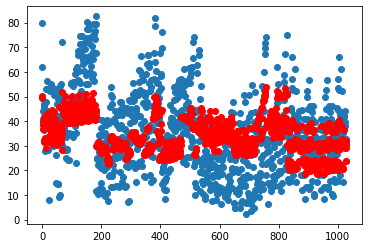

In [ ]:
#to see how close actual data and predicted data we scatter data using matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=list(range(0,len(x))),y=y)#color of actual data is blue
plt.scatter(x=list(range(0,len(x))),y=y_hat,color='red')#color of predicted data is red

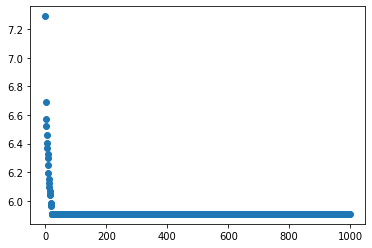

In [ ]:
#plotting the cost function
plt.figure()
plt.scatter(x=list(range(0,1000)), y=J)
plt.show()